In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib import pylab as pl
import matplotlib as mpl
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize
from scipy.interpolate import interp2d
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from labellines import labelLines
from labellines import labelLine

<ipython-input-3-9e38cd746d61>:46: UserWarning: The following kwargs were not used by contour: 'lw'
  ax.contour(z.reshape(shape_x, shape_y).transpose(), levels=levs_contour, extent=(x.min(), x.max(), y.min(), y.max()),


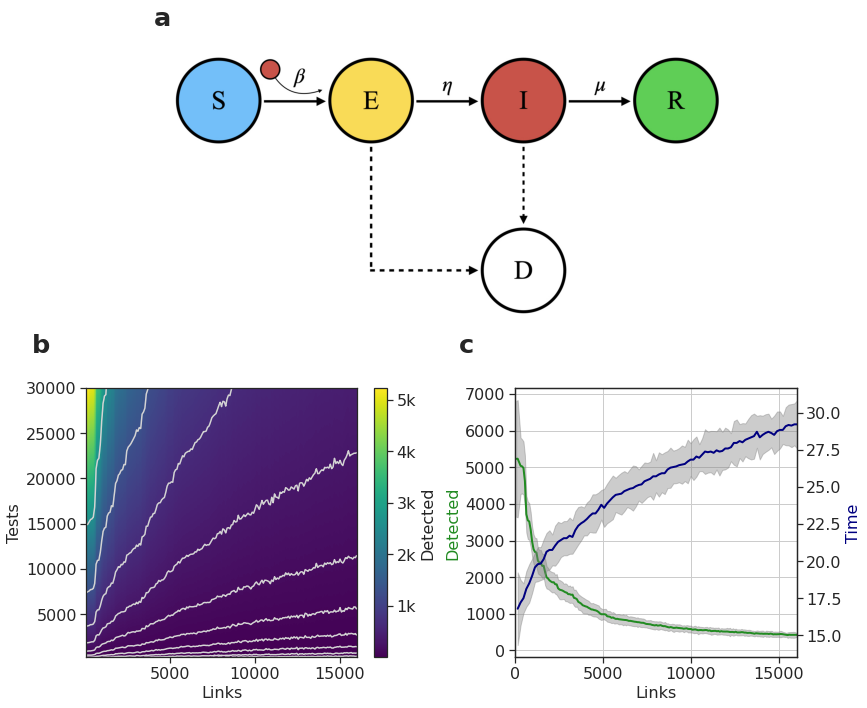

In [3]:
sns.set_theme(style="ticks")

fig,axes = plt.subplot_mosaic('AA;BC' ,figsize=(12, 10), width_ratios=[1.2, 1], height_ratios=[1.2,1])
[ax_img,ax,ax1] = axes.values()
ax2 = ax1.twinx()

label_size = 16
abc_size = 16*1.6

#_______________________________________________________

#open jpeg image from path
img = Image.open('figures/Fig1/seir_tests.jpeg')
#img = Image.open(BytesIO())
ax_img.axis('off')
ax_img.imshow(img)

#_______________________________________________________
name = 'ma'
betastr = '3,0'
heatmap = pd.read_csv('tests/out/' + name + '_30k_beta_' + betastr +
                        '.txt', sep='\t')
heatmap = heatmap[heatmap['links'] < 16000]
# PIVOT TABLE
x = heatmap['links'].to_numpy()
y = heatmap['tests'].to_numpy()
z = heatmap['detected'].to_numpy()

colormap = 'viridis'

# Niveles para hacer líneas de contorno blancas (en escala logaritmica)
# np.floor(np.log10(z.min())-4),
lev_exp = np.linspace(np.log10(z.min()+0.00000001), np.log10(z.max()), 12)
# np.ceil(np.log10(z.max())+4), 4)
levs = np.power(10.0, lev_exp)

lev_exp_contour = lev_exp
levs_contour = np.power(10.0, lev_exp_contour)

shape_x = len(np.unique(x))
shape_y = len(np.unique(y))

# imshow para dibujar simplemente el mapa, sin marcar contornos
ax.imshow(np.flip(z.reshape(shape_x, shape_y), 1).transpose(), extent=(x.min(), x.max(), y.min(), y.max()), aspect='auto',
            cmap=colormap, norm=Normalize(levs.min()+0.01, levs.max()))  # , norm=LogNorm(levs.min(),levs.max()))
ax.contour(z.reshape(shape_x, shape_y).transpose(), levels=levs_contour, extent=(x.min(), x.max(), y.min(), y.max()),
            norm=Normalize(levs.min()+0.01, levs.max()), colors='lightgrey', lw=2)  # , norm=LogNorm(levs.min(),levs.max()))

# COLORBAR
sm = plt.cm.ScalarMappable(cmap=colormap, norm=Normalize(vmin=min(levs), vmax=max(levs)))
#sm.set_array([])
cbar2 = fig.colorbar(sm, ax=ax, format= mpl.ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000) + 'k'))

ax.set_xlabel('Links', size=label_size)
ax.set_ylabel('Tests', size=label_size)
ax.tick_params(labelsize=label_size)

cbar2.ax.tick_params(labelsize=label_size)
cbar2.ax.set_ylabel('Detected', size=label_size)




#_______________________________________________________


data = pd.read_csv('tests/out/' + name + '_30k_beta_' + betastr +
                        '.txt', sep='\t')
data = data[data['tests']==30000]
sns.set_theme(style="ticks")

ax1.plot('links', 'detected', data=data, color='forestgreen', lw=2)
ax1.fill_between(x=data['links'], y1=data['detected']+ 1*data['error'], y2=data['detected']-1*data['error'], color='gray', alpha=0.4)

# ax1.set_title(name, size=16)
ax1.set_xlabel('Links', size=label_size)
ax1.set_ylabel('Detected', size=label_size, color='forestgreen')
ax1.tick_params(labelsize=label_size)

data = pd.read_csv('times/out/' + name + '_30k_beta_' + betastr +
                        '.txt', sep='\t')

ax2.plot('links', 'time', data=data, color='navy', lw=2)
ax2.fill_between(data=data, x=data['links'], y1=data['time']+data['error'], y2=data['time']-data['error'], color='gray', alpha=0.4)
# ax2.set_title(name, size=16)
ax2.set_xlabel('Links', size=label_size)
ax2.set_ylabel('Time', size=label_size, color='navy')
ax2.tick_params(labelsize=label_size)

ax1.set_xlim(0, 16000)

ax1.grid('True')


#_______________________________________________________


ax_img.text(0,0, s='a', fontsize=abc_size, fontweight='bold', va='top', ha='left')
ax.text(-0.2,1.2, s='b', fontsize=abc_size, fontweight='bold', va='top', ha='left', transform=ax.transAxes)
ax1.text(-0.2,1.2, s='c', fontsize=abc_size, fontweight='bold', va='top', ha='left', transform=ax1.transAxes)


fig.tight_layout(w_pad=1)


In [4]:
fig.savefig('figures/Fig1/Fig1.eps', dpi=300, bbox_inches="tight")


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


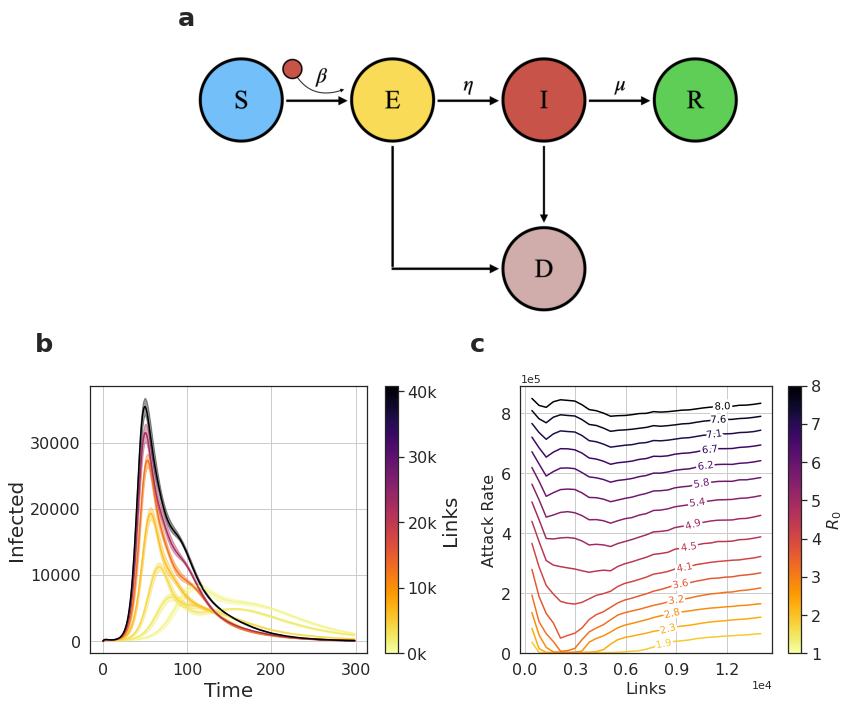

In [5]:
sns.set_theme(style="white")

fig,axes = plt.subplot_mosaic('AA;BC' ,figsize=(12, 10), width_ratios=[1.1, 1], height_ratios=[1.2,1])
[ax_img,ax,ax1] = axes.values()
label_size = 16
abc_size = 16*1.6

#_______________________________________________________


#open jpeg image from path
img = Image.open('figures/Fig2/seir_confinement.jpeg')
#img = Image.open(BytesIO())
ax_img.axis('off')
ax_img.imshow(img)




#_______________________________________________________

data = pd.read_csv('confinement/out/trajectories/ma_beta_4,0.txt', sep='\t', names=['links', 'time', 'infected', 'error'])

links = data['links'].drop_duplicates()
links = links[links.isin([1237, 2474, 3711, 6185, 12371, 22269, 40826])]

colors = mpl.colormaps['inferno_r']

sns.set_theme(style="ticks")

for l in links:
    ax.plot('time', 'infected', color = colors((l)/(links.max())), data=data[data['links'] == l],
        label=l)
    ax.fill_between(x=data[data['links'] == l]['time'], y1=data[data['links'] == l]['infected']+ 2*data[data['links'] == l]['error'],
        y2=data[data['links'] == l]['infected']-2*data[data['links'] == l]['error'], color=colors((l)/(links.max())), alpha=0.4) 
sm = plt.cm.ScalarMappable(cmap=colors, norm=Normalize(0, links.max()))
cbar=fig.colorbar(sm, ax=ax, format= mpl.ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000) + 'k'))


ax.set_xlabel('Time', size=20)
ax.set_ylabel('Infected', size=20)
ax.tick_params(labelsize=16)
cbar.ax.tick_params(labelsize=16)
cbar.ax.set_ylabel('Links', size=20)

ax.grid('True')

#_______________________________________________________


heatmap = pd.read_csv('confinement/out/attackRateMap/ma.txt', sep='\t', names=['beta','links', 'attackRate', 'error'])
heatmap = heatmap[heatmap['beta'].isin(heatmap['beta'].drop_duplicates()[::2])]
heatmap = heatmap.drop(heatmap[heatmap['beta'].isin([1,1.4375])].index, axis=0)

pivotTable = pd.pivot_table(data = heatmap, index = 'beta', columns = 'links', values='attackRate')

linearColor = mpl.colormaps['inferno_r']
beta_max,beta_min = 8, 1
for i,val in enumerate(heatmap['beta'].drop_duplicates()):
    links_text = 11472
    color=linearColor((val-beta_min)/(beta_max-beta_min))
    ax1.plot('links', 'attackRate', data=heatmap[heatmap['beta']==val], color=color, label=f'{val:.1f}')
    # ax1.text(links_text, heatmap[(heatmap['beta']==val) & (heatmap['links']==links_text)]['attackRate'].max(),
    #         r'$R_0$ = ' + f'{val:.2f}', color=color, fontsize=8, bbox=dict(facecolor='white', alpha=1, pad=-1), ha='center', va='center')

labelLines(plt.gca().get_lines(), zorder=2.5, xvals=(8000, 12000), outline_width=5, fontsize=10)

# COLORBAR
sm = plt.cm.ScalarMappable(cmap=linearColor, norm=Normalize(vmin=beta_min, vmax=beta_max))
#sm.set_array([])
cbar = fig.colorbar(sm, ax=ax1)

ax1.set_xlabel('Links', size=label_size)
ax1.set_ylabel('Attack Rate', size=label_size)
ax1.tick_params(labelsize=label_size)
ax1.xaxis.set_major_locator(mpl.ticker.MaxNLocator(5))
# ax1.xaxis.set_major_formatter(lambda x, pos: '{:.0f}'.format(x/1000) + 'k')
# ax1.yaxis.set_major_formatter(lambda x, pos: '{:.0f}'.format(x/1000) + 'k')
ax1.ticklabel_format(axis='both', style='sci', scilimits=(0,0))


cbar.ax.tick_params(labelsize=label_size)
cbar.ax.set_ylabel(r'$R_0$', size=label_size)

ax1.grid('True')
ax1.set_ylim(0,)

#_______________________________________________________


ax_img.text(0,0, s='a', fontsize=abc_size, fontweight='bold', va='top', ha='left')
ax.text(-0.2,1.2, s='b', fontsize=abc_size, fontweight='bold', va='top', ha='left', transform=ax.transAxes)
ax1.text(-0.2,1.2, s='c', fontsize=abc_size, fontweight='bold', va='top', ha='left', transform=ax1.transAxes)


fig.tight_layout(w_pad=1)

In [19]:
fig.savefig('figures/Fig2/Fig2.svg', dpi=300, bbox_inches="tight")

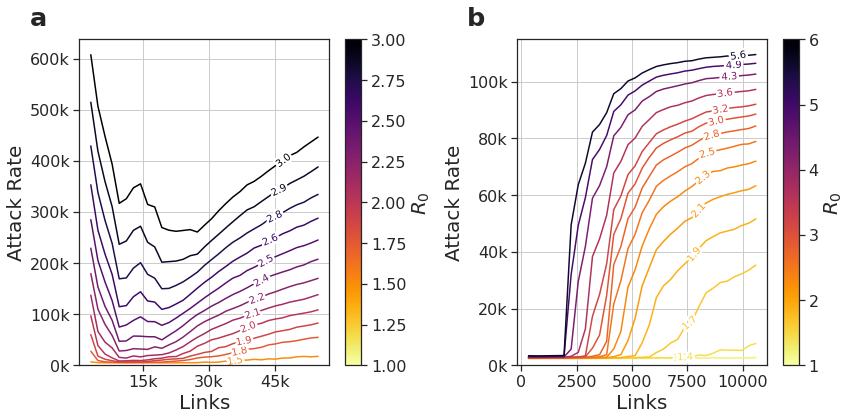

In [5]:
fig, [ax,ax1] = plt.subplots(1,2, figsize=(12,6))
label_size = 16
abc_size = 16*1.6

#_______________________________________________________

heatmap = pd.read_csv('confinement/out/attackRateMap/bogotabeta_1-3.txt', sep='\t', names=['beta','links', 'attackRate', 'error'])
heatmap = heatmap[heatmap['beta'].isin(heatmap['beta'].drop_duplicates()[::2]) & ((heatmap['beta'] > 1.7) | (heatmap['beta']==1.5))]
heatmap = heatmap.drop(heatmap[heatmap['beta'].isin([1])].index, axis=0)
# heatmap = heatmap[heatmap['beta'] < 1.5]
pivotTable = pd.pivot_table(data = heatmap, index = 'beta', columns = 'links', values='attackRate')


linearColor = mpl.colormaps['inferno_r']
beta_max,beta_min = 3, 1
for i,val in enumerate(heatmap['beta'].drop_duplicates()):
    links_text = 45203
    color=linearColor((val-beta_min)/(beta_max-beta_min))
    ax.plot('links', 'attackRate', data=heatmap[heatmap['beta']==val], color=color, label=f'{val:.1f}')
    # ax.text(links_text, heatmap[(heatmap['beta']==val) & (heatmap['links']==links_text)]['attackRate'].max(),
    #         r'$R_0$ = ' + f'{val:.2f}', color=color, fontsize=8, bbox=dict(facecolor='white', alpha=1, pad=-1), ha='center', va='center')

labelLines(ax.get_lines(), zorder=2.5, xvals=(35000, 48000), outline_width=5, fontsize=10)

# COLORBAR
sm = plt.cm.ScalarMappable(cmap=linearColor, norm=Normalize(vmin=beta_min, vmax=beta_max))
#sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)

ax.set_xlabel('Links', size=20)
ax.set_ylabel('Attack Rate', size=20)
ax.tick_params(labelsize=16)
ax.xaxis.set_major_formatter(lambda x, pos: '{:.0f}'.format(x/1000) + 'k')
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(5))
ax.yaxis.set_major_formatter(lambda x, pos: '{:.0f}'.format(x/1000) + 'k')

cbar.ax.tick_params(labelsize=16)
cbar.ax.set_ylabel(r'$R_0$', size=20)

ax.grid('True')

ax.set_ylim(0,)

#_______________________________________________________


heatmap = pd.read_csv('confinement/out/attackRateMap/miami.txt', sep='\t', names=['beta','links', 'attackRate', 'error'])
heatmap = heatmap[heatmap['beta'] < 6]
heatmap = heatmap[heatmap['beta'].isin(heatmap['beta'].drop_duplicates()[::3]) | (heatmap['beta'] < 3.2)]
heatmap = heatmap.drop(heatmap[heatmap['beta'].isin([1])].index, axis=0)

pivotTable = pd.pivot_table(data = heatmap, index = 'beta', columns = 'links', values='attackRate')

linearColor = mpl.colormaps['inferno_r']
beta_max,beta_min = 6, 1
for i,val in enumerate(heatmap['beta'].drop_duplicates()):
    links_text = 9312
    color=linearColor((val-beta_min)/(beta_max-beta_min))
    ax1.plot('links', 'attackRate', data=heatmap[heatmap['beta']==val], color=color, label=f'{val:.1f}')
    # ax1.text(links_text, heatmap[(heatmap['beta']==val) & (heatmap['links']==links_text)]['attackRate'].max(),
    #         r'$R_0$ = ' + f'{val:.2f}', color=color, fontsize=8, bbox=dict(facecolor='white', alpha=1, pad=-1), ha='center', va='center')

labelLines(ax1.get_lines(), zorder=2.5, xvals=(7000, 10000), outline_width=5, fontsize=10)

# COLORBAR
sm = plt.cm.ScalarMappable(cmap=linearColor, norm=Normalize(vmin=beta_min, vmax=beta_max))
#sm.set_array([])
cbar = fig.colorbar(sm, ax=ax1)

ax1.set_xlabel('Links', size=20)
ax1.set_ylabel('Attack Rate', size=20)
ax1.tick_params(labelsize=16)
ax1.yaxis.set_major_formatter(lambda x, pos: '{:.0f}'.format(x/1000) + 'k')


cbar.ax.tick_params(labelsize=16)
cbar.ax.set_ylabel(r'$R_0$', size=20)

ax1.grid('True')
ax1.set_ylim(0,)

#_______________________________________________________

ax.text(-0.2,1.1, s='a', fontsize=abc_size, fontweight='bold', va='top', ha='left', transform=ax.transAxes)
ax1.text(-0.2,1.1, s='b', fontsize=abc_size, fontweight='bold', va='top', ha='left', transform=ax1.transAxes)

fig.tight_layout(w_pad=1)

In [16]:
fig.savefig('figures/Fig3/Fig3.pdf', dpi=300, bbox_inches="tight")

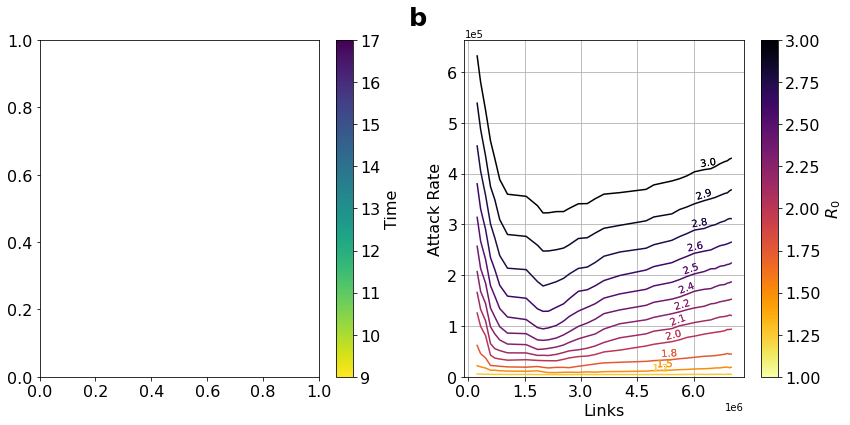

In [10]:
fig, [ax,ax1] = plt.subplots(1, 2, figsize=(12, 6))
label_size = 16
abc_size = 16*1.6

betastr = '8,0'
links = pd.read_csv('times/out/bogota_30k_beta_' + betastr + '.txt', sep='\t')
transport = pd.read_csv('public_transport/times/out/bogota_transport_30k_beta_' + betastr + '.txt', sep='\t')

lower = links['detected'].iloc[-1]

colormap = mpl.colormaps['viridis_r']

max_days,min_days = 17,9

for i in range(len(links)):
    ax.plot(links['population'].iloc[i:i+2], links['detected'].iloc[i:i+2], lw=1.4, c = colormap((links['time'].iloc[i]-min_days)/(max_days-min_days)))
    
for i in range(len(transport)):
    ax.plot(transport['population'].iloc[i:i+2], transport['detected'].iloc[i:i+2], lw=1.4, c = colormap((transport['time'].iloc[i] - min_days)/(max_days-min_days)))

    # ax.plot(transport['population'], transport['detected'], label='Transport Lines', c = 'blue', lw=1.4)

sm = plt.cm.ScalarMappable(cmap=colormap, norm=Normalize(vmin=min_days, vmax=max_days))
cbar=fig.colorbar(sm, ax=ax)

total_pop = links['population'].max()

#Plot again the lines with alpha = 0 to set the legend
ax.plot(links['population'], links['detected'], label='Links', alpha=0)
ax.plot(transport['population'], transport['detected'], label='Transport', alpha=0)
ax.plot([0,7100000], [lower, lower], label='Random', c = 'grey', lw = 2, linestyle = 'dashed')

labelLine(ax.get_lines()[-3], zorder=2.5, x=0.1*total_pop, outline_width=5, align=False, yoffset=600, color=colormap(0.4))
labelLine(ax.get_lines()[-2], zorder=2.5, x=0.081*total_pop, outline_width=5, align=False, yoffset=-600, color=colormap(0.8))
labelLine(ax.get_lines()[-1], zorder=2.5, x=0.05*total_pop, outline_width=5, align=False, yoffset=-500, color='grey')

# ax.legend(fontsize=label_size)


ax.set_xlabel('Population tested', size=label_size)
ax.set_ylabel('Detected', size=label_size)
ax.tick_params(labelsize=label_size)
ax.set_xlim(0,0.14*total_pop)
ax.set_ylim(0,)

ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000) + 'k'))

percentages = np.array([0,2,4,6,8,10,12,14]) * total_pop / 100
ax.xaxis.set_major_locator(mpl.ticker.FixedLocator(percentages))
ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/total_pop*100) + '%'))

ax.grid('True')

cbar.ax.tick_params(labelsize=label_size)
cbar.ax.set_ylabel('Time', size=label_size)

#_______________________________________________________


heatmap = pd.read_csv('public_transport/confinement/out/attackRateMap/bogota_transport_beta_1-3.txt', sep='\t', names=['beta','links', 'attackRate', 'error'])
heatmap = heatmap[heatmap['beta'].isin(heatmap['beta'].drop_duplicates()[::2]) | (heatmap['beta'] < 2)]
heatmap = heatmap[heatmap['beta'].isin(heatmap['beta'].drop_duplicates()[::4]) | (heatmap['beta'] > 2)]
heatmap = heatmap.drop(heatmap[heatmap['beta'].isin([1])].index, axis=0)
pivotTable = pd.pivot_table(data = heatmap, index = 'beta', columns = 'links', values='attackRate')


linearColor = mpl.colormaps['inferno_r']
beta_max,beta_min = 3, 1
for i,val in enumerate(heatmap['beta'].drop_duplicates()):
    links_text = 5622490
    color=linearColor((val-beta_min)/(beta_max-beta_min))
    ax1.plot('links', 'attackRate', data=heatmap[heatmap['beta']==val], color=color, label=f'{val:.1f}')
    # ax1.text(links_text, heatmap[(heatmap['beta']==val) & (heatmap['links']==links_text)]['attackRate'].max(),
    #         r'$R_0$ = ' + f'{val:.2f}', color=color, fontsize=8, bbox=dict(facecolor='white', alpha=1, pad=-1), ha='center', va='center')

labelLines(ax1.get_lines(), zorder=2.5, xvals=(5000000, 6500000), outline_width=5, fontsize=10)

# COLORBAR
sm = plt.cm.ScalarMappable(cmap=linearColor, norm=Normalize(vmin=beta_min, vmax=beta_max))
#sm.set_array([])
cbar = fig.colorbar(sm, ax=ax1)

ax1.set_xlabel('Links', size=label_size)
ax1.set_ylabel('Attack Rate', size=label_size)
ax1.tick_params(labelsize=label_size)
# ax1.xaxis.set_major_formatter(lambda x, pos: '{:.0f}'.format(x/1000) + 'k')
ax1.xaxis.set_major_locator(mpl.ticker.MaxNLocator(5))
# ax1.yaxis.set_major_formatter(lambda x, pos: '{:.0f}'.format(x/1000) + 'k')
ax1.ticklabel_format(axis='both', style='sci', scilimits=(0,0))

cbar.ax.tick_params(labelsize=label_size)
cbar.ax.set_ylabel(r'$R_0$', size=label_size)

ax1.grid('True')
ax1.set_ylim(0,)
#_______________________________________________________

ax.text(-0.2,1.1, s='a', fontsize=abc_size, fontweight='bold', va='top', ha='left', transform=ax.transAxes)
ax1.text(-0.2,1.1, s='b', fontsize=abc_size, fontweight='bold', va='top', ha='left', transform=ax1.transAxes)

ax.clear()
fig.tight_layout(w_pad=1)

In [11]:
fig.savefig('figures/Fig4/Fig4.svg', dpi=200, bbox_inches="tight")

In [3]:
betastr = '8,0'
links = pd.read_csv('times/out/bogota_30k_beta_' + betastr + '.txt', sep='\t')
transport = pd.read_csv('public_transport/times/out/bogota_transport_30k_beta_' + betastr + '.txt', sep='\t')


In [25]:
transport

,population,links,tests,detected,time,error,time_error
0,5865,438,30000,12316.20,9.79167,1819.340,3.108010
1,13418,1184,30000,10465.30,10.29170,1368.750,3.026500
2,21067,2167,30000,9129.04,10.70830,1164.390,2.797570
3,25259,2688,30000,8445.50,11.00000,1048.290,2.828430
4,28390,3428,30000,8093.62,11.08330,969.421,2.511090
...,...,...,...,...,...,...,...
252,1114759,107651,30000,3358.46,16.91670,253.925,0.986013
253,1117817,107840,30000,3352.54,17.04170,282.458,0.909059
254,1119087,108017,30000,3338.46,16.95830,279.053,0.909059
255,1120662,108150,30000,3337.83,17.08330,231.367,0.986013


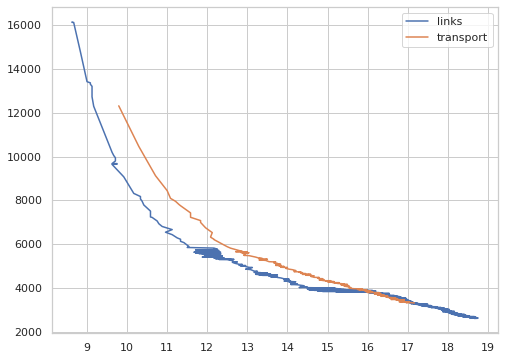

In [30]:
sns.set_theme(style="whitegrid")
links2 = links.sort_values(by=['detected'], ascending=False)
transport2 = transport.sort_values(by=['detected'], ascending=False)

fig,ax=plt.subplots(1,1, figsize=(8,6))
ax.plot(links2['time'], links2['detected'], label='links')
ax.plot(transport2['time'], transport2['detected'], label='transport')
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(12))
ax.legend()

In [20]:
name = 'bogota_transport'
sns.set_theme(style="white")

heatmap = pd.read_csv('public_transport/confinement/out/attackRateMap/' + name + '_beta_1-3.txt', sep='\t', names=['beta','links', 'attackRate', 'error'])


# PIVOT TABLE

pivotTable = pd.pivot_table(data = heatmap, index = 'beta', columns = 'links', values='attackRate')

colormap = 'viridis'

/tmp/ipykernel_19109/1628162499.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  linearColor = mpl.cm.get_cmap('inferno_r')


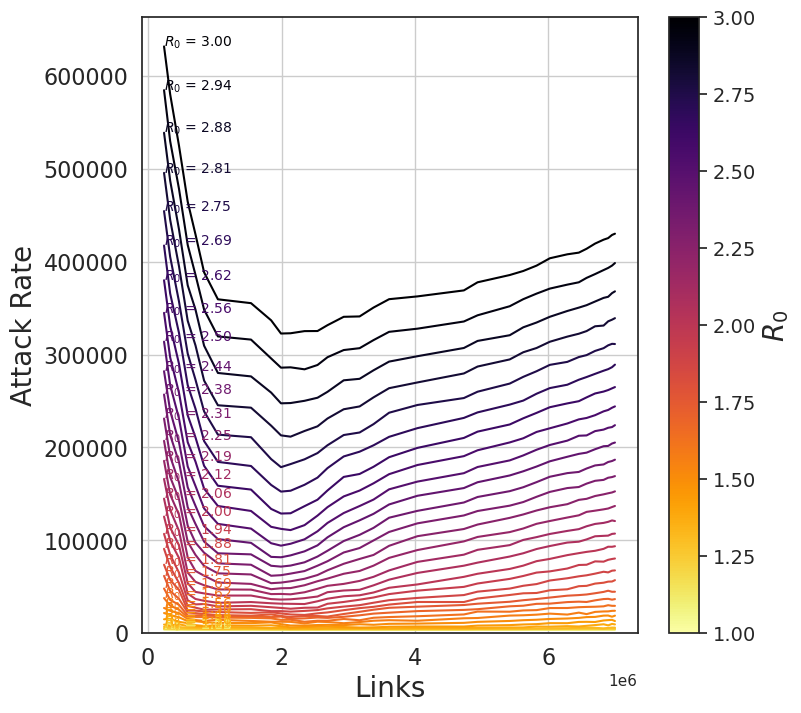

In [21]:
fig, ax = plt.subplots(figsize=(8,8))
linearColor = mpl.cm.get_cmap('inferno_r')
beta_max,beta_min = 3,1
for i,val in enumerate(heatmap['beta'].drop_duplicates()):
    color=linearColor((val-beta_min)/(beta_max-beta_min))
    plt.plot('links', 'attackRate', data=heatmap[heatmap['beta']==val], color=color)
    ax.text(heatmap[heatmap['beta']==val]['links'].min(), heatmap[heatmap['beta']==val]['attackRate'].max(), r'$R_0$ = ' + f'{val:.2f}', color=color, fontsize=10)
# COLORBAR
sm = plt.cm.ScalarMappable(cmap=linearColor, norm=Normalize(vmin=beta_min, vmax=beta_max))
#sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)

ax.set_xlabel('Links', size=20)
ax.set_ylabel('Attack Rate', size=20)
ax.tick_params(labelsize=16)

cbar.ax.tick_params(labelsize=14)
cbar.ax.set_ylabel(r'$R_0$', size=20)

ax.grid('True')

ax.set_ylim(0,)

plt.savefig('figures/confinement/bogota_transport_attackrate.pdf', bbox_inches="tight")